In [1]:
from pathlib import Path
from PIL import Image
from tqdm import tqdm
data_path = Path("/mnt/vol_b/datasets/")
ocean_data_path = data_path/"oceans"
new_width, new_height = 320,320
ocean_data_path_small = data_path/f"oceans_small_{new_width}_{new_height}"
ocean_data_path_small.mkdir(parents=True, exist_ok=True)

In [2]:
image_paths = list(ocean_data_path.glob("*.png"))

In [37]:
for image_path in tqdm(image_paths):
    try:
        img = Image.open(image_path)
    except Exception as e:
        print(f"Issue with {image_path} {e}")
        continue
    width, height = img.size 
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2
    # Crop the center of the image
    small_img = img.crop((left, top, right, bottom))
    small_img.save((ocean_data_path_small/f"{image_path.stem}.png").absolute())
    # print((ocean_data_path_small/f"{image_path.stem}.png").absolute())
    # break
# img

 64%|██████▍   | 582/906 [00:30<00:16, 19.09it/s]


OSError: image file is truncated

In [30]:
image_paths

[]

In [3]:
from pathlib import Path
from nflows.datasets import OceanData

/home/ubuntu/.cache/pypoetry/virtualenvs/nflows-VYLojdXp-py3.8/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data_path = Path("/mnt/vol_b/datasets/")
od = OceanData(data_path/"oceans_small_320_320")

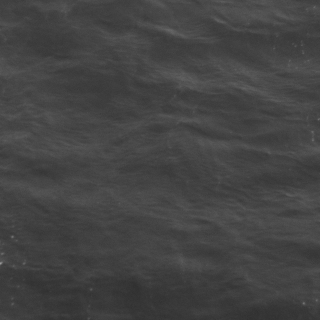

In [6]:
items = []
i=0
for data, _ in od:
    items.append(data)
    i+=1
    if i > 3:
        break


    
items[0]

In [21]:
from datasets import load_dataset, list_metrics, list_datasets

dataset = load_dataset("Guldeniz/flower_dataset", split="train")


Using custom data configuration Guldeniz--flower_dataset-76bf7c5dcabef548
Found cached dataset parquet (/home/ubuntu/.cache/huggingface/datasets/Guldeniz___parquet/Guldeniz--flower_dataset-76bf7c5dcabef548/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


In [22]:
train_ds = dataset.with_format("torch")

In [23]:
from torch.utils.data import DataLoader

dl = DataLoader(dataset=train_ds)

In [24]:
for batch in dl:
    print(batch)
    break

{'image': tensor([[[[236, 235, 240],
          [243, 242, 247],
          [245, 244, 249],
          ...,
          [ 61,  52,  53],
          [ 57,  48,  49],
          [ 39,  30,  31]],

         [[238, 237, 242],
          [245, 244, 249],
          [245, 244, 249],
          ...,
          [ 55,  46,  47],
          [ 51,  42,  43],
          [ 36,  27,  28]],

         [[235, 234, 239],
          [239, 238, 243],
          [238, 237, 242],
          ...,
          [ 64,  55,  56],
          [ 60,  51,  52],
          [ 46,  37,  38]],

         ...,

         [[128, 119,  54],
          [136, 127,  60],
          [139, 129,  57],
          ...,
          [ 45,  43,  31],
          [ 49,  47,  35],
          [ 54,  54,  46]],

         [[118, 109,  44],
          [127, 118,  51],
          [131, 121,  49],
          ...,
          [ 37,  35,  23],
          [ 39,  37,  25],
          [ 40,  40,  32]],

         [[131, 122,  57],
          [141, 132,  65],
          [145, 135,  63],